# Credit Card Fraud Detection

### 🚣‍♂️목적 
신용카드사는 고객의 비정상적인 카드 거래를 방지하고 이에 대한 적절한 조치를 취해야 한다.

</br>

### 🧩특징  
본 데이터셋은 2013년 9월 유럽의 신용카드 사용자들의 2일간 거래 내역에 대하여,  
PCA(주성분 분석)을 통해 개인정보 등의 보호가 필요한 정보들에 대해서는 Masking 처리가 이루어진,  
즉 원본 내용에 대해서 정확한 정보를 파악하기 어려운 데이터로 구성되어있다.  
데이터셋은 매우 불균형하고 Frauds는 모든 거래의 0.172%를 차지한다.

① 개인정보 보호로 인해, 'Time'과 'Amount'(거래 금액) 열에 대해서만 Variable (변수)가 무엇을 의미하는지 명시되어 있으며,  
나머지 열 (V1 ~ V28)에 대해서는 정확히 무엇을 의미하는지 확인할 수 없다.

② 분류, 분석을 통해 파악하고자 하는 Target Label(Y)에 해당하는 'Class' 열은 0과 1 (사기)로 구성되어 있다.

③ 데이터셋은 284,807개의 이틀간 거래 내역을 '행'으로 지니고 있으며, 그중에서 492개의 비정상적인 거래 내역을 갖고 있다.  

</br>

### 📔코드북

- Row (행) : 시간대에 따른 1개의 거래 내역
- Column (열) : Time, Amount, Class, V1 ~ 28

    **Independent Variable (X 변수)**
    - Time: 첫 번째 신용카드 거래와 해당 행에 해당하는 신용카드 거래 사이에 존재하는 경과 시간 
    - V1 ~ V28: 주성분 분석을 통해 가려진 1회 거래 시 발생하는 정보
    - Amount: 거래 금액
    
  **Class Variable (Y 변수)** 
    - Class: 0은 정상 거래, 1은 신용카드 사기 

[출처] <a href="https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud">Credit Card Fraud Detection</a>

## Step 1. 필요한 패키지와 데이터셋 불러오기

In [1]:
from sklearn.model_selection import train_test_split
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
pd.set_option('display.max_columns', None)
card_df = pd.read_csv("data/creditcard.csv")
card_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Step 2. 데이터셋 분석

In [3]:
# 데이터셋의 크기와 결측값 확인하기
print(card_df.shape)
print(card_df.isna().sum())

(284807, 31)
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [4]:
# 데이터셋에 대한 요약 정보
card_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

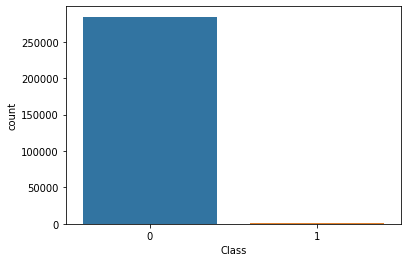

In [5]:
# EDA
sns.countplot(card_df["Class"])
plt.show()

## Step 3. 데이터 전처리

In [6]:
# 복사본 만들어두기
df_copy = card_df.copy()

In [7]:
# X_variables와 Y_class를 구분하기
X_variables = df_copy.drop("Class", axis=1)
Y_class = df_copy["Class"]

In [8]:
# train, test 분할
X_train, X_test, y_train, y_test = train_test_split(X_variables, Y_class, test_size=0.3, random_state=0)

In [9]:
# 제대로 분리되었는지 확인
## 0은 Certified, 1은 Fraud
print(y_train.value_counts(normalize=True) * 100)
print(y_test.value_counts(normalize=True) * 100)

0    99.82695
1     0.17305
Name: Class, dtype: float64
0    99.827955
1     0.172045
Name: Class, dtype: float64


In [10]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# 평가 수행을 위한 평가 방법들이 정의되어 있는 함수 
def evaluation(y_test, pred=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}'.format(accuracy, precision, recall, f1))

In [11]:
# classification_report
from sklearn.metrics import classification_report

## Step 4. 분류에 사용할 모델 선택하기

### 로지스틱 회귀 (Logistic Regression)
* `정의`  
회귀 분석을 통해서 데이터가 어떠한 범주에 속할 확률을 0과 1사이에서 예측하고,   
구해진 확률에 따라서 가능성이 더 높은 범주에 속하는 것으로 '분류'하는 지도 학습 알고리즘

ex) 확률 0.5를 임계값으로 설정한다면, 0.5보다 작으면 False, 0.5보다 크면 True로 분류하는 방식

* `모형`  
![대체 텍스트](https://t1.daumcdn.net/cfile/tistory/99F325485C7B76BC2B)

* `종류`  
범주형 자료에 대해서 이진 분류를 하는데 가장 대표적으로 사용된다.  
(* 여러 개에 대해서 분류할 때에도 '다항 로지스틱 회귀모형'을 사용할 수 있다.)

In [12]:
from sklearn.linear_model import LogisticRegression

# 로지스틱 회귀 모델을 객체화 선언
model_lr = LogisticRegression()

In [13]:
# 원하는 모델로 학습하고 예측값과 예측의 정도를 반환
def modeling(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    return pred

In [14]:
pred_lr = modeling(model_lr, X_train, y_train, X_test, y_test)
evaluation(y_test, pred_lr)

오차 행렬
[[85262    34]
 [   52    95]]
정확도: 0.9990, 정밀도: 0.7364, 재현율: 0.6463, F1: 0.6884


In [15]:
print(classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.74      0.65      0.69       147

    accuracy                           1.00     85443
   macro avg       0.87      0.82      0.84     85443
weighted avg       1.00      1.00      1.00     85443



### 의사결정나무, 랜덤포레스트

In [16]:
# 의사결정나무, 랜덤포레스트
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

model_tree = DecisionTreeClassifier()
model_rf = RandomForestClassifier()

In [17]:
# 의사결정나무
pred_tree = modeling(model_tree, X_train, y_train, X_test, y_test)
evaluation(y_test, pred_tree)

오차 행렬
[[85268    28]
 [   38   109]]
정확도: 0.9992, 정밀도: 0.7956, 재현율: 0.7415, F1: 0.7676


In [18]:
# 랜덤포레스트 - 적합시간이 너무 오래걸려 데이터의 일부만 사용
pred_rf = modeling(model_rf, X_train.iloc[:50000], y_train[:50000], X_test, y_test)
evaluation(y_test, pred_rf)

오차 행렬
[[85289     7]
 [   47   100]]
정확도: 0.9994, 정밀도: 0.9346, 재현율: 0.6803, F1: 0.7874


## Step 5. 모형 개선하기

* `분류모형의 평가`   
1. 정확도 (Accuracy) : 예측이 맞은 것의 비율 (True를 True라, False을 False이라 맞춘 비율)  
2. 정밀도 (Precision) : True라고 예측한 것 중 실제 True의 비율  
3. 재현율 (Recall) : 실제 True 중 True라 예측한 것의 비율  
4. F1 Score : 정밀도와 재현율의 조화평균  
정밀도와 재현율은 어느 정도 Trade-off의 관계를 지니고 있음

### 방법 1️⃣: 특정 수치형 변수에 대해 데이터 스케일링 (Data Scaling) 진행

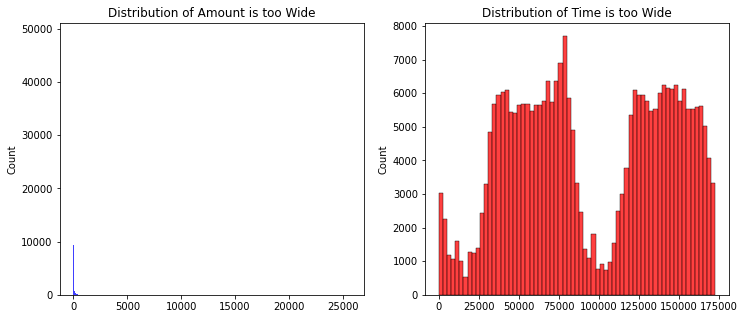

In [19]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(card_df["Amount"].values, ax=ax[0], color='b')
ax[0].set_title("Distribution of Amount is too Wide")

sns.histplot(card_df["Time"].values, ax=ax[1], color='r')
ax[1].set_title("Distribution of Time is too Wide")
plt.show()

In [20]:
card_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.168375e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.074095e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.487313e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.213481e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.406331e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


📊 그래프 해석  
Amount, Time 그래프 전부 x축의 범위가 지나치게 넓다. (Amount 25000, Time 175000)  
그 이유는 V1 ~ V28까지는 주성분 분석으로 스케일링 되어 있지만, Amount와 Time은 별다른 전처리 과정을 거치지 않았기 때문이다.

### Amount, Time을 스케일링
* StrandardScalser()

In [21]:
# 스케일링을 위한 패키지 불러오기
from sklearn.preprocessing import StandardScaler

# 사이킷런의 StandardScaler 클래스 객체화
normalization = StandardScaler()

# 원본 데이터셋 스케일링을 위한 복사본 생성
df_copy_norm = card_df.copy()

# 스케일링을 위해 바꾸려는 변수의 크기 확인
print(df_copy_norm.shape)
print(df_copy_norm["Amount"].shape)

(284807, 31)
(284807,)


* `normalizaion.fit_transform(데이터셋["스케일링 할 feature"]).values.reshape(변수의 크기설정)`  
* `.reshape(-1, 1)`: 데이터의 사이즈가 지금처럼 (284807,)로 되어있으면 의도치않게 차원이 틀어지는 경우가 있어서 (284807, 1)로 변형해준다.  
사이즈(또는 차원)에서 `-1`이라는 숫자는 자동으로 남은 사이즈를 계산해준다.

In [22]:
df_copy_norm["Amount"].values

array([149.62,   2.69, 378.66, ...,  67.88,  10.  , 217.  ])

In [23]:
# Amount 변수 스케일링하기
amount_norm = normalization.fit_transform(df_copy_norm["Amount"].values.reshape(-1, 1))

# Time 변수 스케일링하기
time_norm = normalization.fit_transform(df_copy_norm["Time"].values.reshape(-1, 1))

print(amount_norm.shape)
print(time_norm.shape)

(284807, 1)
(284807, 1)


### 데이터셋에 스케일링한 데이터열을 추가하기
* 데이터셋.insert(열위치, 열name, 추가할 데이터열)
* .drop()

In [24]:
# 데이터셋에 스케일링한 변수를 입력하기
df_copy_norm.insert(0, "Amount_Scaled", amount_norm)
df_copy_norm.insert(1, "Time_Scaled", time_norm)

# 기존의 열 제거하기
df_copy_norm = df_copy_norm.drop(["Time", "Amount"], axis=1)

In [25]:
df_copy_norm.head(2)

,Amount_Scaled,Time_Scaled,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,0.244964,-1.996583,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.342475,-1.996583,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0


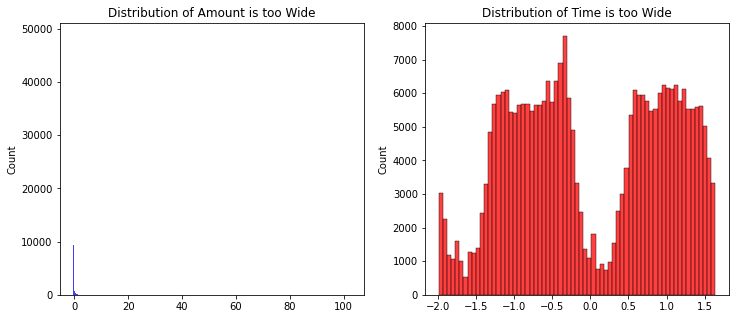

In [26]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(df_copy_norm["Amount_Scaled"].values, ax=ax[0], color='b')
ax[0].set_title("Distribution of Amount is too Wide")

sns.histplot(df_copy_norm["Time_Scaled"].values, ax=ax[1], color='r')
ax[1].set_title("Distribution of Time is too Wide")
plt.show()

📊 그래프 해석  
베이스라인의 Amount, Time 그래프 전부 x축의 범위가 지나치게 넓다. (Amount 25000, Time 175000)  
그 이유는 V1 ~ V28까지는 주성분 분석으로 스케일링 되어 있지만, Amount와 Time은 별다른 전처리 과정을 거치지 않았기 때문이다.  

스케일링 후 Amount와 Time 그래프의 x축의 범위가 줄었다는 것을 확인할 수 있다.

In [27]:
# X_variables와 y_class 구분하기
X_variables = df_copy_norm.iloc[:, :-1]
y_class = df_copy_norm.iloc[:, -1]

# train, test 데이터 분할
# stratify: train과 test셋의 Class 비율 일치 시킴 (정답이 한쪽으로 몰려있으면 모델의 정확도를 구할 수 없어짐)
X_train, X_test, y_train, y_test =\
    train_test_split(X_variables, y_class, test_size=0.3, stratify=y_class, random_state=0)

#  제대로 분리되었는 확인
print(y_train.value_counts(normalize=True) * 100)
print(y_test.value_counts(normalize=True) * 100)

# 원하는 모델로 학습하고 예측값과 예측의 정도를 반환
pred_lr = modeling(model_lr, X_train, y_train, X_test, y_test)

# 평가
evaluation(y_test, pred_lr)

0    99.827451
1     0.172549
Name: Class, dtype: float64
0    99.826785
1     0.173215
Name: Class, dtype: float64
오차 행렬
[[85282    13]
 [   55    93]]
정확도: 0.9992, 정밀도: 0.8774, 재현율: 0.6284, F1: 0.7323


In [28]:
# tree
pred_tree = modeling(model_tree, X_train, y_train, X_test, y_test)
evaluation(y_test, pred_tree)

오차 행렬
[[85268    27]
 [   39   109]]
정확도: 0.9992, 정밀도: 0.8015, 재현율: 0.7365, F1: 0.7676


In [29]:
# random forest
pred_rf = modeling(model_rf, X_train, y_train, X_test, y_test)
evaluation(y_test, pred_rf)

오차 행렬
[[85291     4]
 [   40   108]]
정확도: 0.9995, 정밀도: 0.9643, 재현율: 0.7297, F1: 0.8308


### 방법 2️⃣: 자료 변환하기
* log함수로 자료 변환

In [30]:
# log(1+x)로 변환
amount_log = np.log1p(df_copy['Amount'].values.reshape(-1,1))
time_log = np.log1p(df_copy['Time'].values.reshape(-1,1))

시각화하여 log(1+x)로 잘 변환되었는지 확인해보고, 어떤 결과를 채택할 것인지 정할 수 있다.

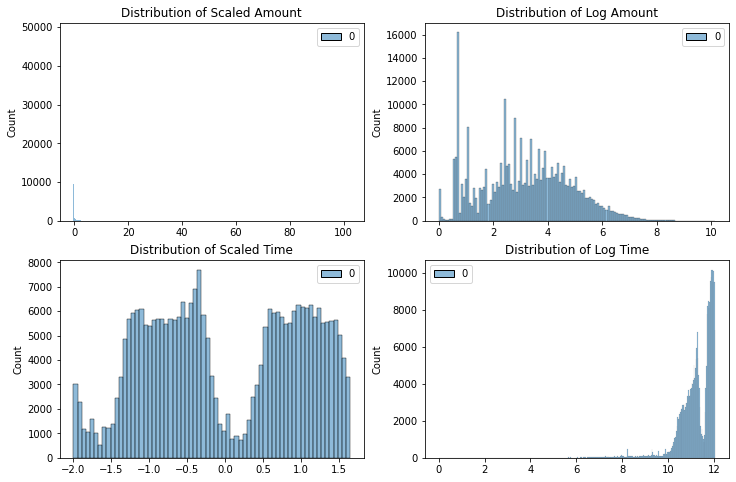

In [31]:
fig, ax =  plt.subplots(2,2, figsize = (12,8))

sns.histplot(amount_norm, ax=ax[0][0], color = 'r')
ax[0][0].set_title('Distribution of Scaled Amount')

sns.histplot(amount_log, ax=ax[0][1], color = 'b')
ax[0][1].set_title('Distribution of Log Amount')

sns.histplot(time_norm, ax=ax[1][0], color = 'r')
ax[1][0].set_title('Distribution of Scaled Time')

sns.histplot(time_log, ax=ax[1][1], color = 'b')
ax[1][1].set_title('Distribution of Log Time')

plt.show()

<참고>
* 그래프만 보고 어떤 것이 전처리가 잘 되었다고 판단하는 것은 위험하다.  
* 지수가 보존되여 연산하기 좋다는 장점때문에 로그화를 추천하는 경우가 많다.  
* 한번 각각 넣어보고 정확도가 높은 것을 결과적으로 선택하는 것이 안전하다.  
  그러나 전처리 방식을 너무 다양하게 채택하면 결과값이 왜곡될 수 있음을 주의해야 한다.

### 방법 3️⃣: 스케일링 과정에서 발견된 이상치 데이터 제거

이상치 반드시 제거해야 하나?  
-> 반드시 제거해야 하는 데이터는 아니다.  
(1) 관측 오류로 인한 Error (2) 매우 유의미한 Extreme data  

해당 Task의 도메인 지식을 활용한 삭제 또는 보전 등의 판별이 중요하다.

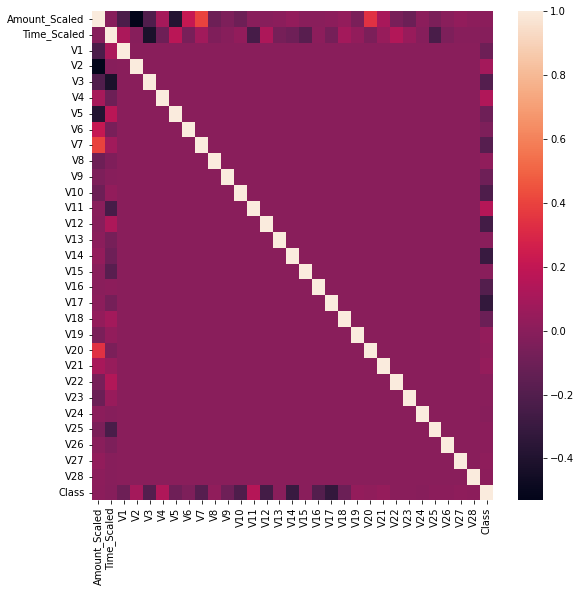

In [32]:
plt.figure(figsize=(9, 9))
corr = df_copy_norm.corr()
sns.heatmap(corr)
plt.show()

Box plot으로 상세히 들여다보기
* `Box plot`: 데이터의 대략적인 분포와 개별적인 이상치들을 동시에 보여줄 수 있으며 서로 다른 데이터 뭉치를 쉽게 비교할 수 있도록 도와주는 시각화 기법

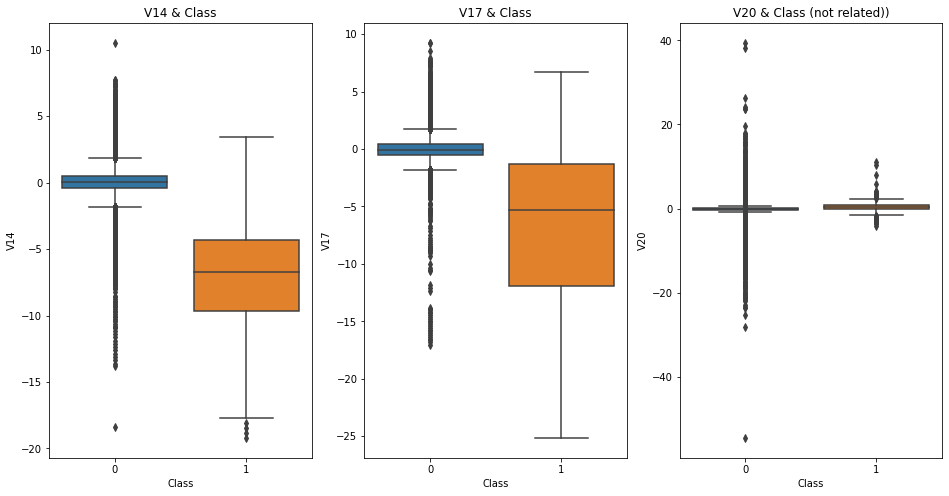

In [33]:
fig, ax = plt.subplots(1,3, figsize=(16, 8))

sns.boxplot(x ="Class", y="V14", data=df_copy_norm, ax=ax[0])
ax[0].set_title("V14 & Class")

sns.boxplot(x="Class", y="V17", data=df_copy_norm, ax=ax[1])
ax[1].set_title("V17 & Class")

sns.boxplot(x="Class", y="V20", data=df_copy_norm, ax=ax[2])
ax[2].set_title("V20 & Class (not related))")

plt.show()

In [34]:
df_copy_norm["V20"].nunique()

275663

In [35]:
def remove_outlier(df=None, column=None, weight=1.5):
    # fraud 클래스만 가져오기
    fraud = df[df['Class'] == 1][column]
    quantile_25 = np.percentile(fraud.values, 25)
    quantile_75 = np.percentile(fraud.values, 75)
    # IQR을 구하고, IQR에 1.5를 곱하여 최대값과 최소값 지점 구함. 
    iqr = quantile_75 - quantile_25
    iqr_weight = iqr * weight
    lowest_val = quantile_25 - iqr_weight
    highest_val = quantile_75 + iqr_weight
    # 최대값 보다 크거나, 최소값 보다 작은 값을 Outlier로 설정하고 DataFrame index 반환. 
    outlier_index = fraud[(fraud < lowest_val) | (fraud > highest_val)].index
    print(len(outlier_index))
    df = df.drop(outlier_index, axis = 0)
    print(df.shape)
    return df

In [36]:
df_copy_norm_out = remove_outlier(df_copy_norm, 'V14')
df_copy_norm_out = remove_outlier(df_copy_norm_out, 'V17')

4
(284803, 31)
0
(284803, 31)


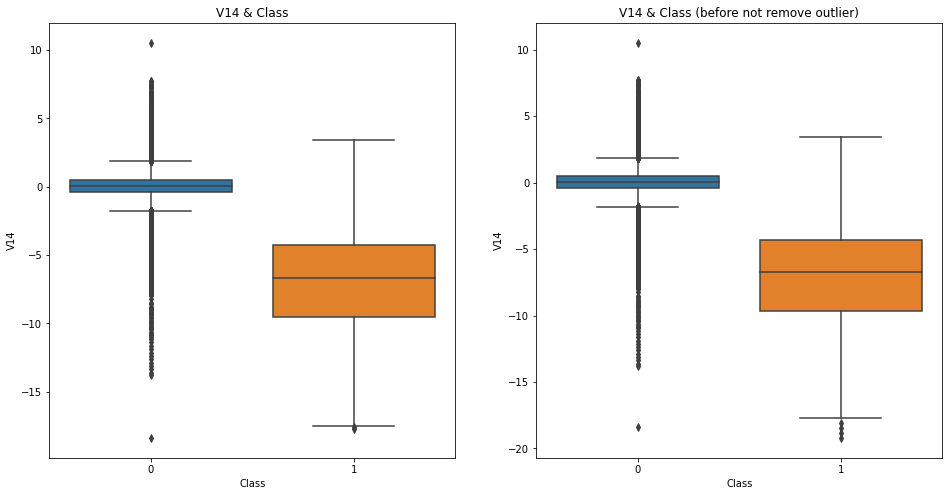

In [37]:
fig, ax = plt.subplots(1,2, figsize=(16, 8))

sns.boxplot(x ="Class", y="V14", data=df_copy_norm_out, ax=ax[0])
ax[0].set_title("V14 & Class")

sns.boxplot(x="Class", y="V14", data=df_copy_norm, ax=ax[1])
ax[1].set_title("V14 & Class (before not remove outlier)")

plt.show()

## Step 6. 모형 재학습
`데이터 스케일링` -> `이상치 제거`

In [38]:
X_variables = df_copy_norm_out.iloc[:, :-1]
Y_class = df_copy_norm_out.iloc[:, -1]

# 훈련 데이터와 실험 데이터 분할
X_train, X_test, y_train, y_test = \
train_test_split(X_variables, Y_class, test_size = 0.3, random_state = 0, stratify = Y_class)

# 제대로 분리되었는지 확인하기
## 1은 Fraud, 0은 Certified
print(y_train.value_counts(normalize=True) * 100)
print(y_test.value_counts(normalize=True) * 100)

0    99.828453
1     0.171547
Name: Class, dtype: float64
0    99.829122
1     0.170878
Name: Class, dtype: float64


In [39]:
# logistic regressor
pred_lr = modeling(model_lr, X_train, y_train, X_test, y_test)
evaluation(y_test, pred_lr)

오차 행렬
[[85281    14]
 [   47    99]]
정확도: 0.9993, 정밀도: 0.8761, 재현율: 0.6781, F1: 0.7645


In [40]:
# tree
pred_tree = modeling(model_tree, X_train, y_train, X_test, y_test)
evaluation(y_test, pred_tree)

오차 행렬
[[85256    39]
 [   37   109]]
정확도: 0.9991, 정밀도: 0.7365, 재현율: 0.7466, F1: 0.7415


In [41]:
# randomforest
pred_rf = modeling(model_rf, X_train, y_train, X_test, y_test)
evaluation(y_test, pred_rf)

오차 행렬
[[85290     5]
 [   31   115]]
정확도: 0.9996, 정밀도: 0.9583, 재현율: 0.7877, F1: 0.8647
